# Portfolio DAY 2 - Unsupervised and Supervised Machine Learning
## PCA - Penguins

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('./data/penguins_size.csv')

In [3]:
# Lets inspect the dataset
df.info

<bound method DataFrame.info of     species_short     island  culmen_length_mm  culmen_depth_mm  \
0          Adelie  Torgersen              39.1             18.7   
1          Adelie  Torgersen              39.5             17.4   
2          Adelie  Torgersen              40.3             18.0   
3          Adelie  Torgersen               NaN              NaN   
4          Adelie  Torgersen              36.7             19.3   
..            ...        ...               ...              ...   
339        Gentoo     Biscoe               NaN              NaN   
340        Gentoo     Biscoe              46.8             14.3   
341        Gentoo     Biscoe              50.4             15.7   
342        Gentoo     Biscoe              45.2             14.8   
343        Gentoo     Biscoe              49.9             16.1   

     flipper_length_mm  body_mass_g     sex  
0                181.0       3750.0    MALE  
1                186.0       3800.0  FEMALE  
2                195.0   

In [4]:
df.columns

Index(['species_short', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df.dtypes

species_short         object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [11]:
# Remove NaN rows and '.' sex
df = df[df['sex'] != '.']
df.dropna(inplace=True)
df.reset_index(inplace=True)

# Select only the numeric values
df_numeric = df.loc[:, df.dtypes == 'float64']

# Remove nan values
df_numeric.dropna(inplace=True)
df_numeric

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [162]:
# Lets scale the numerical values
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [163]:
# Principal Components Analysis with 2 components.
pca = PCA(n_components=2)
df_numeric_scaled_pca = pd.DataFrame(data = pca.fit_transform(df_numeric_scaled), columns = ['pca1', 'pca2'])

df_numeric_scaled_pca


,pca1,pca2
0,-1.853593,0.032069
1,-1.316254,-0.443527
2,-1.376605,-0.161230
3,-1.885288,-0.012351
4,-1.919981,0.817598
...,...,...
328,1.997716,-0.976771
329,1.832651,-0.784510
330,2.751505,0.266556
331,1.713854,-0.725875


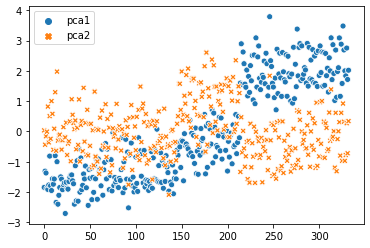

In [164]:
# Plotting the components
plot_pca2 = sns.scatterplot(data=df_numeric_scaled_pca)

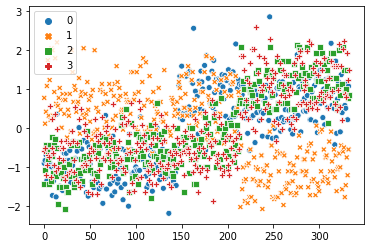

In [165]:
# Plotting the original
plot_org = sns.scatterplot(data=df_numeric_scaled)

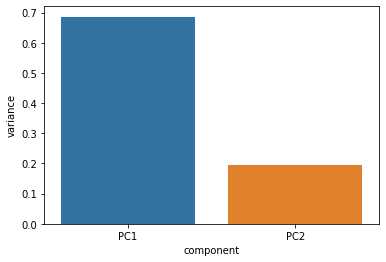

In [166]:
# Investigate the explained variance
explained_variance_df = pd.DataFrame({
    'variance': pca.explained_variance_ratio_,
    'component': ['PC1','PC2'],
})

# Seems to be a nice elbow
sns.barplot(x='component', y="variance", data=explained_variance_df)

In [167]:
# Create target dataframe
y = df.loc[:, df.dtypes != 'float64']

In [168]:
x = df_numeric_scaled_pca

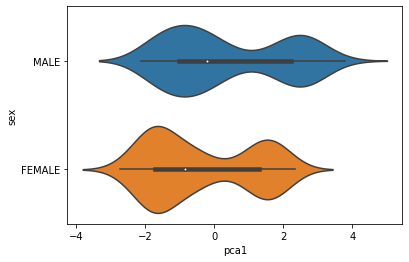

In [171]:
# how pc1 describes sex
sns.violinplot(x=x['pca1'], y=y['sex'])

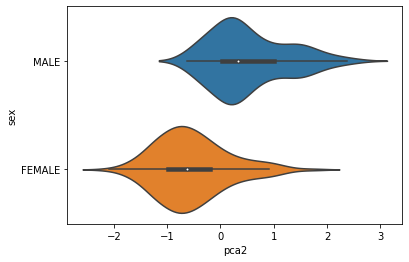

In [172]:
# how pc2 describes sex
sns.violinplot(x=x['pca2'], y=y['sex'])

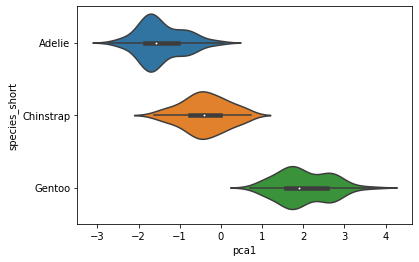

In [174]:
# how pc1 describes species
sns.violinplot(x=x['pca1'], y=y['species_short'])

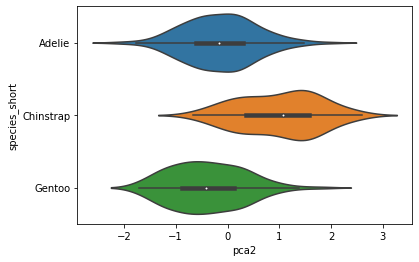

In [175]:
# how pc2 describes species
sns.violinplot(x=x['pca2'], y=y['species_short'])

# Supervised classification

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm

# Ready the input data
df = pd.read_csv('./data/penguins_size.csv')
df = df[df['sex'] != '.']
df.dropna(inplace=True)
df.reset_index(inplace=True)
df = df.loc[:, df.columns != 'index']

target = 'island'
encode = [i for i in ['species_short','island', 'sex'] if i != target] 

# Encode the strings
for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy], axis=1)
    del df[col]

# split training and target
X = df.loc[:, df.columns != target]
y = df.loc[:, df.columns == target]

In [76]:
# Scale the training data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [77]:
# Split the training set, 42 for reproducability
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42, shuffle=True)

In [88]:
# LogisticReg
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 2))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.65
Confusion Matrix: 
[[38 13  3]
 [ 1 31  5]
 [ 2 15  2]]


In [89]:
# Random Forest
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 2))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.65
Confusion Matrix: 
[[41  8  5]
 [ 4 29  4]
 [ 5 13  1]]


In [90]:
# Support Vector Machines
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 2))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.68
Confusion Matrix: 
[[38 14  2]
 [ 0 34  3]
 [ 0 16  3]]


# Conclusion
Species is easy to classify, Sex is doable (+90%) and island is very tricky (68% best)
No hyperparameter tweaking was done, default parameters